<b>Audio and Music Processing Lab - Module 6</b><br>Andrea Poltronieri<br>andrea.poltronieri@upf.edu<br>05.03.2025
## AMPLab2 - Introduction to music21
This notebook demonstrates the basic functionalities of music21 for processing machine readable music scores.

In [47]:
from music21 import converter, environment, key, meter, stream


In order to visualize loaded scores using the `.show()` method, a score editor should be installed and added to [music21's user environment](http://web.mit.edu/music21/doc/usersGuide/usersGuide_24_environment.html#usersguide-24-environment). If you have no such software already installed, I strongly recommend the open source program [MuseScore](https://musescore.org/). From now on, I will be mentioning MuseScore, but you can check how to configure your score editor of choice.

The first time you use music21 in your environment you should run the following cell to set the path to your score editor:

In [48]:
us = environment.UserSettings()
us["musescoreDirectPNGPath"] = "/Applications/MuseScore 4.app/Contents/MacOS/mscore"

Let's load a music score. Music21 will load it as a `stream.base.Score`.

In [49]:
score = converter.parse("lseh-WeiGuoJia-HongYangDong-1.xml")

type(score)

music21.stream.base.Score

We can give it a look using `.show()`. If you'd rather open the score directly in the MuseScore editor, run `s.show('xml')`.

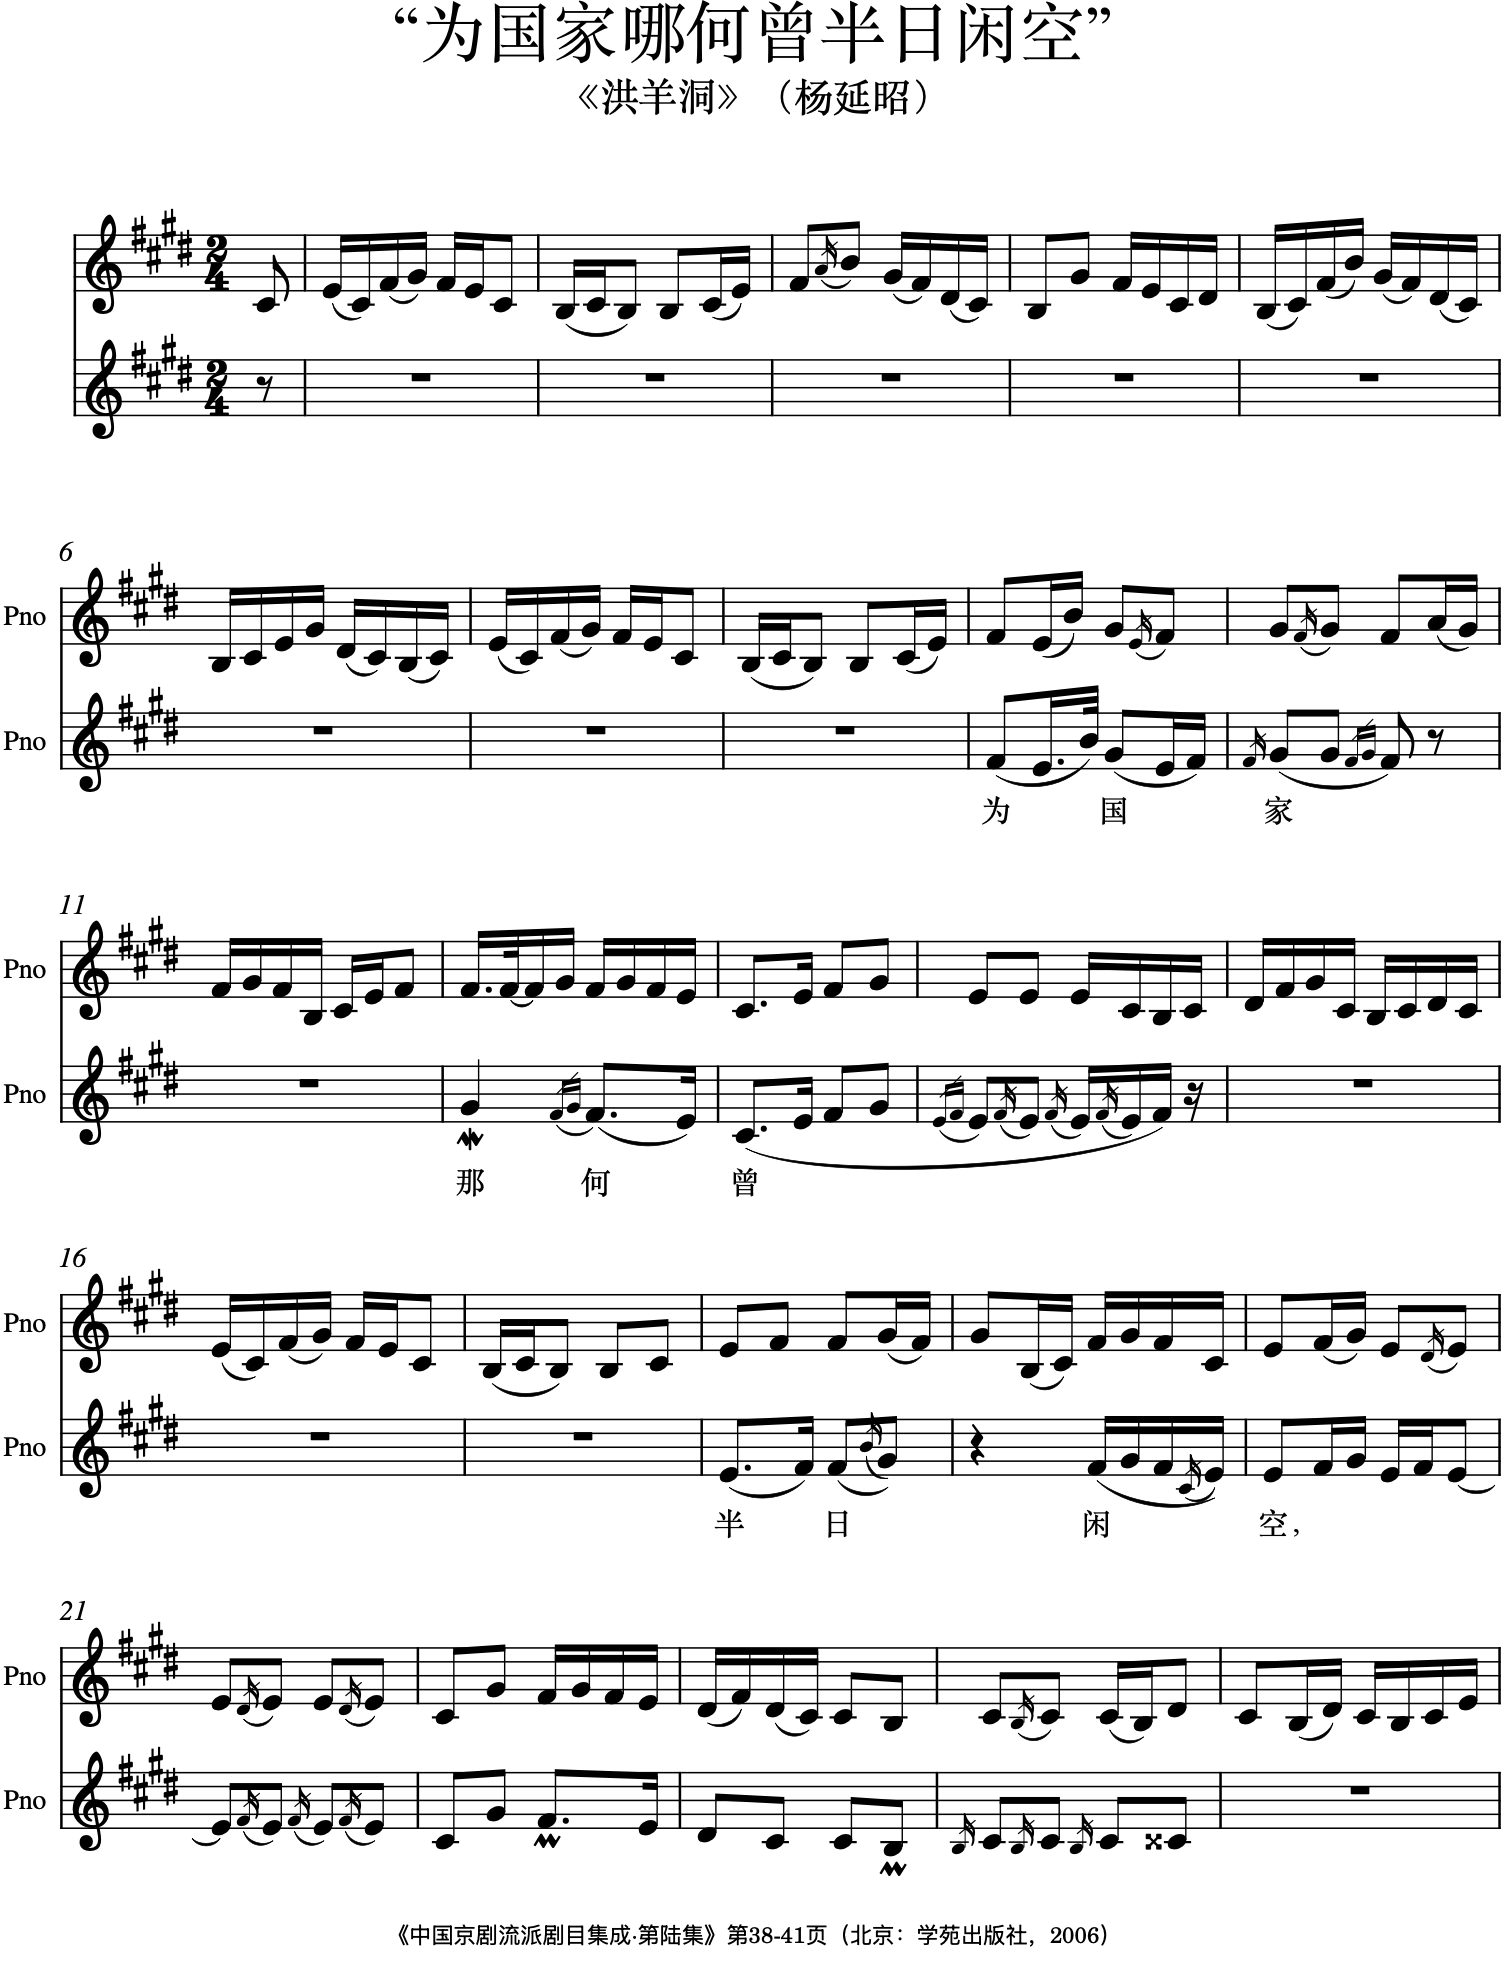

In [50]:
score.show()

If by any chance the score didn't show, make sure you set the path to your score editor by running the command `configure.run()` given above. Then try with the following commands:

In [51]:
# us = environment.UserSettings()
# us['musescoreDirectPNGPath'] = us['musicxmlPath']
# print('musicxmlPath:', us['musicxmlPath'])
# print('musescoreDirectPNGPath:', us['musescoreDirectPNGPath'])

The `.elements` attribute returns a list of all the objects contained in a music21 stream.

In [52]:
print(f"This score contains {len(score.elements)} elements.")

for i, element in enumerate(score.elements):
    print(f"{i}. {type(element)}")

This score contains 7 elements.
0. <class 'music21.text.TextBox'>
1. <class 'music21.text.TextBox'>
2. <class 'music21.text.TextBox'>
3. <class 'music21.metadata.Metadata'>
4. <class 'music21.stream.base.Part'>
5. <class 'music21.stream.base.Part'>
6. <class 'music21.layout.ScoreLayout'>


As you can see, a `stream.Score` contains more than music. If we want to focus on the music, we can call the `.parts` attribute.
<br/>
By the way, music21 will work better if you store anything you retrieve from a stream in another stream, using the `.stream()` method.

In [53]:
scoreParts = score.parts.stream()
for element in scoreParts.elements:
    print(element)

<music21.stream.Part Piano>
<music21.stream.Part Piano>


Now we can work with each of these parts, and have a look at them separately. We can call the `.show()` method with any stream.
<br/>
*\[When the part is opened in the score editor, notice that now all the metadata are missing, because they are not contained in the `stream.Part`, but as specific objects in the `stream.Score`.\]*

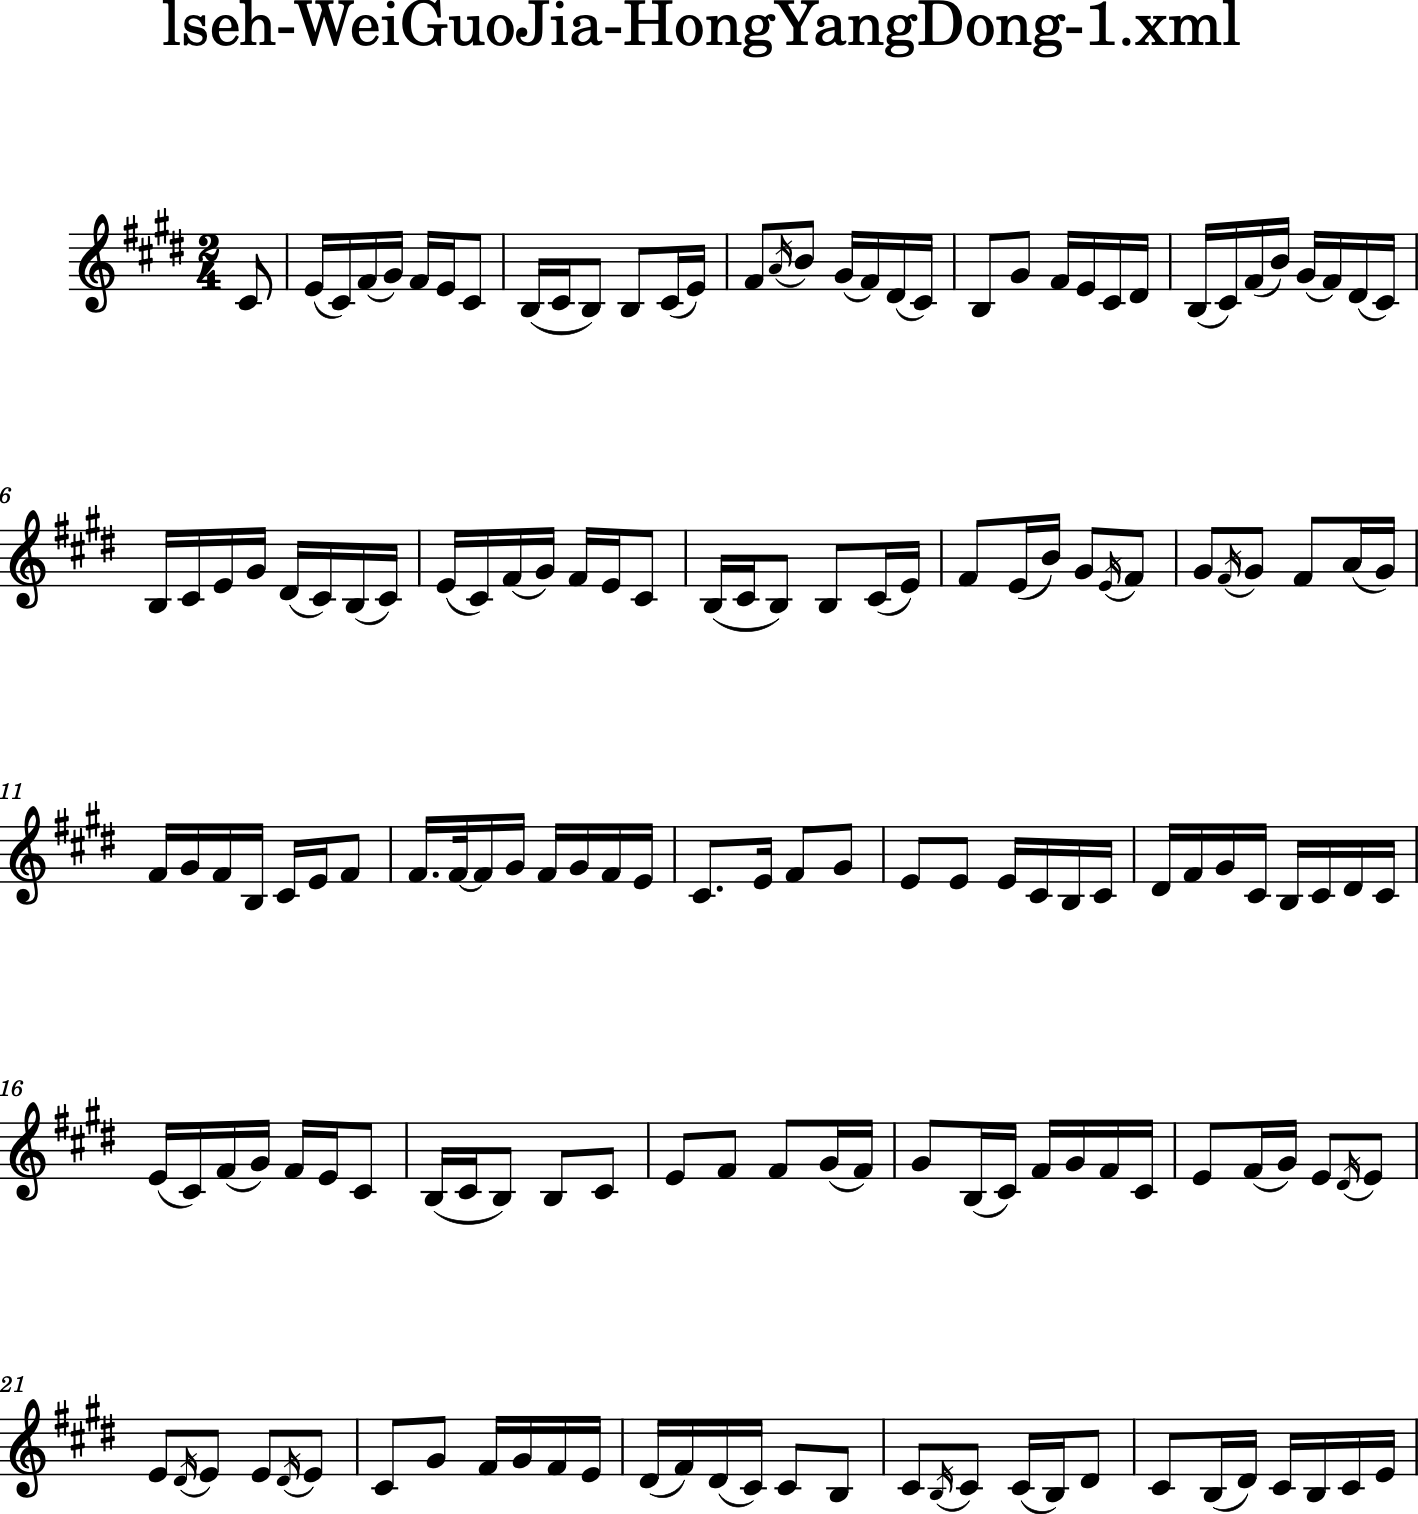

In [54]:
part0 = scoreParts[0]
part1 = scoreParts[1]

part0.show()

These two parts should be equally long, but are they?

In [55]:
print("Elements in part 0:", len(part0.elements))
print("Elements in part 1:", len(part1.elements))

Elements in part 0: 187
Elements in part 1: 154


To understand this difference, let's have a look to what is contained in each part.

In [56]:
part0.elements

(<music21.instrument.Piano 'P1: Piano: Piano'>,
 <music21.stream.Measure 0 offset=0.0>,
 <music21.spanner.Slur <music21.note.Note E><music21.note.Note C#>>,
 <music21.spanner.Slur <music21.note.Note F#><music21.note.Note G#>>,
 <music21.spanner.Slur <music21.note.Note B><music21.note.Note B>>,
 <music21.spanner.Slur <music21.note.Note C#><music21.note.Note E>>,
 <music21.spanner.Slur <music21.note.Note A><music21.note.Note B>>,
 <music21.spanner.Slur <music21.note.Note G#><music21.note.Note F#>>,
 <music21.spanner.Slur <music21.note.Note D#><music21.note.Note C#>>,
 <music21.spanner.Slur <music21.note.Note B><music21.note.Note C#>>,
 <music21.spanner.Slur <music21.note.Note F#><music21.note.Note B>>,
 <music21.spanner.Slur <music21.note.Note G#><music21.note.Note F#>>,
 <music21.spanner.Slur <music21.note.Note D#><music21.note.Note C#>>,
 <music21.spanner.Slur <music21.note.Note D#><music21.note.Note C#>>,
 <music21.spanner.Slur <music21.note.Note B><music21.note.Note C#>>,
 <music21.s

In [57]:
part1.elements

(<music21.instrument.Piano 'P2: Piano: Piano'>,
 <music21.stream.Measure 0 offset=0.0>,
 <music21.spanner.Slur <music21.note.Note F#><music21.note.Note B>>,
 <music21.spanner.Slur <music21.note.Note G#><music21.note.Note F#>>,
 <music21.spanner.Slur <music21.note.Note G#><music21.note.Note F#>>,
 <music21.spanner.Slur <music21.note.Note G#><music21.note.Note F#>>,
 <music21.spanner.Slur <music21.note.Note F#><music21.note.Note F#>>,
 <music21.spanner.Slur <music21.note.Note F#><music21.note.Note F#>>,
 <music21.spanner.Slur <music21.note.Note F#><music21.note.Note E>>,
 <music21.spanner.Slur <music21.note.Note C#><music21.note.Note F#>>,
 <music21.spanner.Slur <music21.note.Note E><music21.note.Note E>>,
 <music21.spanner.Slur <music21.note.Note F#><music21.note.Note E>>,
 <music21.spanner.Slur <music21.note.Note F#><music21.note.Note E>>,
 <music21.spanner.Slur <music21.note.Note F#><music21.note.Note E>>,
 <music21.spanner.Slur <music21.note.Note E><music21.note.Note F#>>,
 <music21.

As you can see, each part contains one instrument object, many slur objects, and many measure objects. The music is contained in the measures, so let's retrieve only those, by using the `.getElementsByClass()` method.
<br/>
Remember to store everything you retrieve from a stream in another stream.

In [58]:
measures0 = part0.getElementsByClass(stream.Measure).stream()
measures1 = part1.getElementsByClass("Measure").stream()
print("Measures in part 0:", len(measures0))
print("Measures in part 1:", len(measures1))

Measures in part 0: 85
Measures in part 1: 85


Let's confirm that we retrieved only measures.

In [59]:
measures0.elements

(<music21.stream.Measure 0 offset=0.0>,
 <music21.stream.Measure 1 offset=0.5>,
 <music21.stream.Measure 2 offset=2.5>,
 <music21.stream.Measure 3 offset=4.5>,
 <music21.stream.Measure 4 offset=6.5>,
 <music21.stream.Measure 5 offset=8.5>,
 <music21.stream.Measure 6 offset=10.5>,
 <music21.stream.Measure 7 offset=12.5>,
 <music21.stream.Measure 8 offset=14.5>,
 <music21.stream.Measure 9 offset=16.5>,
 <music21.stream.Measure 10 offset=18.5>,
 <music21.stream.Measure 11 offset=20.5>,
 <music21.stream.Measure 12 offset=22.5>,
 <music21.stream.Measure 13 offset=24.5>,
 <music21.stream.Measure 14 offset=26.5>,
 <music21.stream.Measure 15 offset=28.5>,
 <music21.stream.Measure 16 offset=30.5>,
 <music21.stream.Measure 17 offset=32.5>,
 <music21.stream.Measure 18 offset=34.5>,
 <music21.stream.Measure 19 offset=36.5>,
 <music21.stream.Measure 20 offset=38.5>,
 <music21.stream.Measure 21 offset=40.5>,
 <music21.stream.Measure 22 offset=42.5>,
 <music21.stream.Measure 23 offset=44.5>,
 <music2

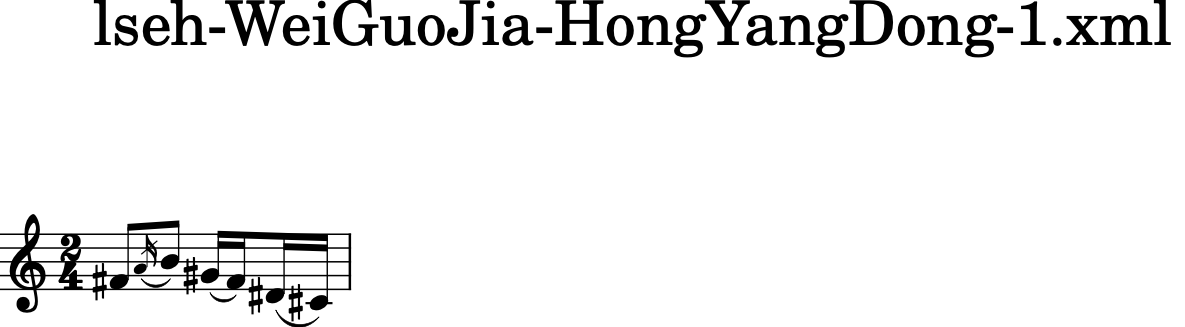

In [60]:
measures0[3].show()

As you can see, each measure is identifid by a number, and also an offset. The concept of **offset** is very important in music21. Every music21 object is stored in a particular position with respect to its containing stream.
<br/>
Let's check that with the first 10 measures, accessing the `.number` and `.offset` attributes in the measures.

In [61]:
for m in measures0[0:10]:
    print("Measure number: {}\tMeasure offset: {}".format(m.number, m.offset))

Measure number: 0	Measure offset: 0.0
Measure number: 1	Measure offset: 0.5
Measure number: 2	Measure offset: 2.5
Measure number: 3	Measure offset: 4.5
Measure number: 4	Measure offset: 6.5
Measure number: 5	Measure offset: 8.5
Measure number: 6	Measure offset: 10.5
Measure number: 7	Measure offset: 12.5
Measure number: 8	Measure offset: 14.5
Measure number: 9	Measure offset: 16.5


Now let's have a look to what is contained in the first measure of the first part.

In [62]:
measure0_0 = measures0[0]
measure0_0.elements

(<music21.layout.SystemLayout>,
 <music21.clef.TrebleClef>,
 <music21.key.KeySignature of 4 sharps>,
 <music21.meter.TimeSignature 2/4>,
 <music21.note.Note C#>)

The first measure of a part usually contains the clef, key signature and time signature objects.
<br/>
Let's have a look to what kind of information we can obtain about the key signature and the time signature.

In [63]:
kS = measure0_0.getElementsByClass(key.KeySignature).stream()[0]
print("Class:", type(kS))
print("Number of altered pitches:", kS.sharps)
print("List of altered pitches:", kS.alteredPitches)
print("Measure number:", kS.measureNumber)
print("Offset:", kS.offset)

Class: <class 'music21.key.KeySignature'>
Number of altered pitches: 4
List of altered pitches: [<music21.pitch.Pitch F#>, <music21.pitch.Pitch C#>, <music21.pitch.Pitch G#>, <music21.pitch.Pitch D#>]
Measure number: 0
Offset: 0.0


In [64]:
tS = measure0_0.getElementsByClass(meter.TimeSignature).stream()[0]
print("Class:", type(tS))
print("Numerator:", tS.numerator)
print("Denominator:", tS.denominator)
print("Measure number:", tS.measureNumber)
print("Offset:", tS.offset)

Class: <class 'music21.meter.base.TimeSignature'>
Numerator: 2
Denominator: 4
Measure number: 0
Offset: 0.0


Moving to another measure.

In [65]:
measure0_3 = part0.measure(3)
print("Measure number {} in offset {}".format(measure0_3.number, measure0_3.offset))
print()
print("It contains the following elements:")
for element in measure0_3.elements:
    print(element)

Measure number 3 in offset 4.5

It contains the following elements:
<music21.note.Note F#>
<music21.spanner.Slur <music21.note.Note A><music21.note.Note B>>
<music21.spanner.Slur <music21.note.Note G#><music21.note.Note F#>>
<music21.spanner.Slur <music21.note.Note D#><music21.note.Note C#>>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note G#>
<music21.note.Note F#>
<music21.note.Note D#>
<music21.note.Note C#>


This is the most common case, measures usually contain just notes (including rests).

Now, let's start working with note objects. They also have offsets, and we can check if they are a note or a rest.

In [66]:
n1 = measure0_3[0]
print("Class", type(n1))
print("Measure number:", n1.measureNumber)
print("Note offset:", n1.offset)
print("Is it a note?", n1.isNote)
print("Is it a rest?", n1.isRest)

Class <class 'music21.note.Note'>
Measure number: 3
Note offset: 0.0
Is it a note? True
Is it a rest? False


Notice that the note's offset is related to its containing stream, measure 3, and not to the whole score.

A note object, when it is a note, contains a pitch object and a duration object.
<br/>
Let's have a look first to the attributes of the pitch object contained in `n1`.

In [67]:
print("Frequency:", n1.pitch.frequency)
print("Name:", n1.pitch.name)
print("Step:", n1.pitch.step)
print("Octave:", n1.pitch.octave)
print("Name with octave:", n1.pitch.nameWithOctave)
print("Midi:", n1.pitch.midi)
print("Name in Spanish:", n1.pitch.spanish)
print()
print("Accidental:", n1.pitch.accidental.name)
print("Accidental value:", n1.pitch.accidental.alter)

Frequency: 369.99442271163434
Name: F#
Step: F
Octave: 4
Name with octave: F#4
Midi: 66
Name in Spanish: fa sostenido

Accidental: sharp
Accidental value: 1.0


Let's have a look now to the attributes of the duration object contained in `n1`.

In [68]:
print("Duration type:", n1.duration.type)
print("Duration name:", n1.duration.fullName)
print("Duration as quarter length:", n1.duration.quarterLength)

Duration type: eighth
Duration name: Eighth
Duration as quarter length: 0.5


Some of this information is very commonly used, so it can be retrieved directly from the note object.

In [69]:
print("Name:", n1.name)
print("Step:", n1.step)
print("Octave:", n1.octave)
print("Name with octave:", n1.nameWithOctave)
print()
print("Duration as quarter length:", n1.quarterLength)

Name: F#
Step: F
Octave: 4
Name with octave: F#4

Duration as quarter length: 0.5


[Grace notes](https://en.wikipedia.org/wiki/Grace_note) are assigned a `quarterLength` duration of 0, and are located in the same offset as the following main note.

In [70]:
n2 = measure0_3[1]
n3 = measure0_3[2]
print("Name:\t\t{}\t{}".format(n2.nameWithOctave, n3.nameWithOctave))
print("Duration:\t{}\t{}".format(n2.quarterLength, n3.quarterLength))
print("Offset:\t\t{}\t{}".format(n2.offset, n3.offset))

AttributeError: 'Slur' object has no attribute 'nameWithOctave'

Let's take now a note from the second part.

In [ ]:
measure1_9 = part1.measure(9)
n4 = measure1_9[0]
print("Name:", n4.nameWithOctave)
print("Duration:", n4.quarterLength)

Name: F#4
Duration: 0.5


With the `.lyric` attribute we can check if a note object contains lyrics.

In [ ]:
print("Does n1 have lyrics?", n1.lyric is not None)
print("Does n4 have lyrics?", n4.lyric is not None)

Does n1 have lyrics? False
Does n4 have lyrics? True


`n4` contains lyrics. Now we can look at it.

In [ ]:
print("n4's lyric:", n4.lyric)

n4's lyric: 为


Duration can be extended using dots and ties. Music21 handels them in the following ways.

In [ ]:
n5 = measure1_9[1]
print("Duration:", n5.quarterLength)
print("Duration type:", n5.duration.type)
print("Duration name:", n5.duration.fullName)
print("Duration as quarter length:", n5.duration.quarterLength)
print("Dots:", n5.duration.dots)

Duration: 0.375
Duration type: 16th
Duration name: Dotted 16th
Duration as quarter length: 0.375
Dots: 1


In [ ]:
measure1_20 = part1.measure(20)
measure1_21 = part1.measure(21)
n6 = measure1_20[-1]
n7 = measure1_21.elements[2]
print("Pitch name:\t{}\t{}".format(n6.nameWithOctave, n7.nameWithOctave))
print("Duration:\t{}\t{}".format(n6.quarterLength, n7.quarterLength))
print("Tie:\t\t{}\t{}".format(n6.tie.type, n7.tie.type))

Pitch name:	E4	E4
Duration:	0.5	0.5
Tie:		start	stop


In [ ]:
measure1_21.elements

(<music21.layout.SystemLayout>,
 <music21.layout.StaffLayout distance 65, staffNumber 1, staffSize None, staffLines None>,
 <music21.note.Note E>,
 <music21.note.Note F#>,
 <music21.note.Note E>,
 <music21.note.Note F#>,
 <music21.note.Note E>,
 <music21.note.Note F#>,
 <music21.note.Note E>)